In [1]:
import numpy as np

In [14]:
m = 100
x = 6 * np.random.randn(m,1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m,1)

In [16]:
y.shape

(100, 1)

In [17]:
from matplotlib import pyplot as plt

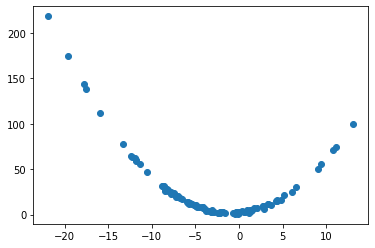

In [20]:
plt.scatter(x,y)
plt.show()

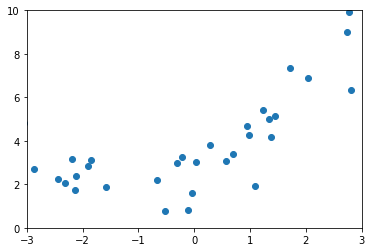

In [21]:
plt.scatter(x,y)
plt.axis([-3,3, 0, 10])
plt.show()

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s Poly
nomialFeatures class to transform our training data, adding the square (2nd-degree
polynomial) of each feature in the training set as new features (in this case there is
just one feature):

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
poly_feautre = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_feautre.fit_transform(x)

In [26]:
x_poly.shape

(100, 2)

In [28]:
x[0]

array([-7.40693654])

In [29]:
x_poly[0]

array([-7.40693654, 54.86270891])

In [30]:
from sklearn.linear_model import LinearRegression

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
lin_reg.intercept_, lin_reg.coef_

(array([2.16505697]), array([[1.0024829 , 0.49896256]]))

In [35]:
#Not bad: the model estimates y = 0 . 56x1 2 + 0 . 93x1 + 1 . 78 when in fact the original
#function was y = 0 . 5x1 2 + 1 . 0x1 + 2 . 0 + Gaussian noise.

In [36]:
# PolynomialFeatures(degree=d) transforms an array containing n
# features into an array containing n + d !
# d! n! features, where n! is the
# factorial of n,

# Learning Curves

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [40]:
def learning_curve(model, x, y):
    xtr, xte, ytr, yte = train_test_split(x,y, test_size = 0.2)
    tr_err, val_err = [], []
    for m in range(1, len(xtr)):
        model.fit(xtr[:m], ytr[:m])
        ytr_pred = model.predict(xtr[:m])
        yte_pred = model.predict(xte)
        tr_err.append(mean_squared_error(ytr[:m], ytr_pred))
        val_err.append(mean_squared_error(yte, yte_pred))
    plt.plot(np.sqrt(tr_err), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_err), "b-", linewidth=3, label="val")
    plt.legend()

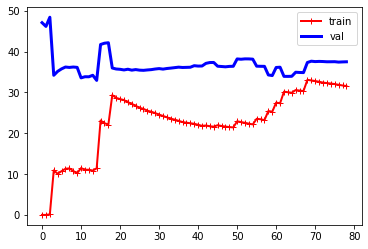

In [44]:
lin_reg = LinearRegression()
learning_curve(lin_reg, x, y)

Now let’s look at the learning curves of a 10th-degree polynomial model on the same
data

In [45]:
from sklearn.pipeline import Pipeline

In [46]:
poly_reg = Pipeline([
("poly_feature", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", LinearRegression()),
])

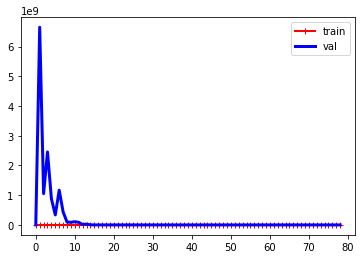

In [54]:
learning_curve(poly_reg,x,y)